# SIRD model playground

Given the following equations of the SIRD model

\begin{align*}
\frac{dS}{dt} &= -\beta \cdot S \cdot I \\
\frac{dI}{dt} &= \beta \cdot S \cdot I - (\gamma \cdot I) - (\delta \cdot I) \\
\frac{dR}{dt} &= \gamma \cdot I \\
\frac{dD}{dt} &= \delta \cdot I
\end{align*}

Given the initial conditions: *population, cases, deaths, recovered* and *Basic reproductive rate (R0), Mortality rate ratio (M), Average infectios period (P)* it is possible to compute the correspondent ODEs and then obtain the *S, I, R, D* params

In [17]:
from sird_base_model import SIRD
import matplotlib.pyplot as plt
import pandas as pd
from pso import DAYS

In [18]:
def get_params_from_file():
    with open("../data/best_solution.csv") as f:
        res = pd.read_csv(f) 
    return res.iloc[0].to_dict()

In [19]:
initial_conditions = {
    "population": 60e6,
    'initial_I': 1577,
    'initial_R': 83,
    'initial_D': 34
}
beta = 0.6397873716594259
gamma = 0.02598574446744427
delta = 0.2757542890507501

beta, gamma, delta = get_params_from_file().values()
print(beta, gamma, delta)
#beta, gamma, delta = 0.639, 0.2757, 0.0259#0.35, 0.001, 0.442

0.8871957590655747 0.001 0.1168190547480453


In [20]:
model = SIRD(beta=beta, gamma=gamma, delta=delta)

For a population of 60000000.0 people, after 70 days there were:
99.0% total deaths, or 1 people.
0.8% total recovered, or 0 people.
At the virus' maximum 59.9% people were simultaneously infected, or 1 people.
After 70 days the virus was present in less than 0 individuals.


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.036e-01 ...  6.950e+01  7.000e+01]
        y: [[ 1.000e+00  1.000e+00 ...  5.555e-04  5.552e-04]
            [ 2.628e-05  3.875e-05 ...  1.528e-03  1.440e-03]
            [ 1.383e-06  1.400e-06 ...  8.471e-03  8.472e-03]
            [ 5.667e-07  2.459e-06 ...  9.894e-01  9.895e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 128
     njev: 0
      nlu: 0

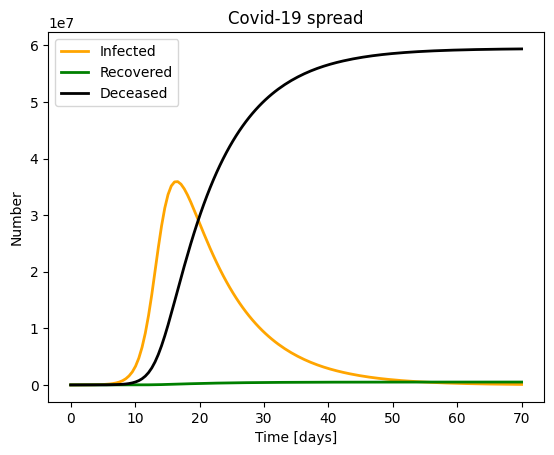

In [21]:
days = DAYS
model.solve(initial_conditions, days)
model.plot(susceptible=False)
model.soln

In [22]:
# Parameters after a simulation
params = model.get_sird_values()
print(params)

{'S': 33309.57738154001, 'I': 86416.03233458415, 'R': 508321.31101290794, 'D': 59371953.07927099, 'Sum params:': 60000000.000000015}


,totale_positivi,dimessi_guariti,deceduti
0,221,1,7
1,311,1,10
2,385,3,12
3,588,45,17
4,821,46,21
...,...,...,...
65,104657,71252,27682
66,101551,75945,27967
67,100943,78249,28236
68,100704,79914,28710


<Axes: >

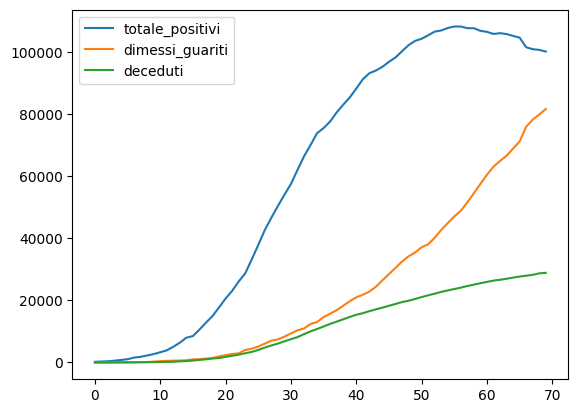

In [23]:
# Viz real data
df = pd.read_csv('../data/daily_processed.csv')
# Lineplot totale_positivi, dimessi_guariti, deceduti giving iloc
partial_df = df.iloc[:DAYS, 1:4]
display(partial_df)
partial_df.plot()

For a population of 60000000.0 people, after 70 days there were:
99.0% total deaths, or 1 people.
0.8% total recovered, or 0 people.
At the virus' maximum 59.9% people were simultaneously infected, or 1 people.
After 70 days the virus was present in less than 0 individuals.


<Axes: title={'center': 'Covid-19 spread'}, xlabel='Time [days]', ylabel='Number'>

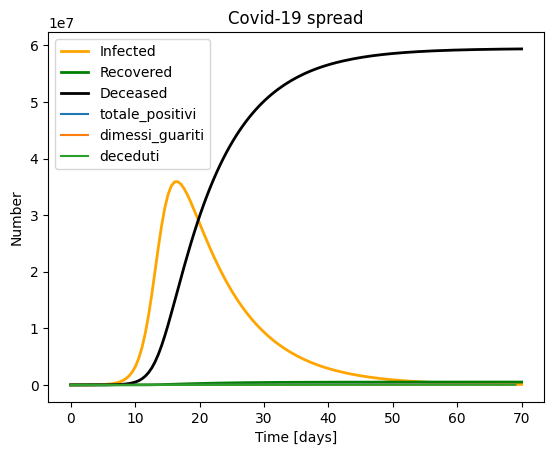

In [30]:
s, i, r, d = model.get_sird_series().values()
# from this list plot the series converted to pandas
computed_df = pd.DataFrame({
    'I': i,
    'R': r,
    'D': d
})

partial_df.plot(ax=model.plot(susceptible=False))